# Project 1: SAT & ACT Analysis


## Problem Statement

Problem Statement
What actions should be taken to increase stn participation rates among high school students in taking the SAT and ACT college entrance exams?



## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [3]:
act2017 = pd.read_csv("../data/act_2017.csv", encoding = "ISO-8859-1")
sat2017 = pd.read_csv("../data/sat_2017.csv", encoding = "ISO-8859-1")

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [4]:
act2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [5]:
sat2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [10]:
sat2017.tail(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
41,South Dakota,3%,612,603,1216
42,Tennessee,5%,623,604,1228
43,Texas,62%,513,507,1020
44,Utah,3%,624,614,1238
45,Vermont,60%,562,551,1114
46,Virginia,65%,561,541,1102
47,Washington,64%,541,534,1075
48,West Virginia,14%,558,528,1086
49,Wisconsin,3%,642,649,1291
50,Wyoming,3%,626,604,1230


In [11]:
sat2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [12]:
act2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [13]:
sat2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: The data looks complete yet has some typos/errors (such as an "x" at the end of the last line of act 2017) that will be fixed during cleaning.

#### 4a. Does the data look complete? 

Answer: Yes the data seems to be complete.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer: Min: 200, Max: 800 per subtest. min 400, max 1600 for full test
There are some values below the min.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [14]:
# Maryland Math sat 2017 should be 524, not 52
# Wyoming Composite act 2017 should be 20.2 not 20.2x (fixed when changing dtypes below)



sat2017.loc[sat2017.State == "Maryland", "Math"] = 524

#### 5. What are your data types? 
Display the data types of each feature. 

In [15]:
act2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: ACT Composite is "object" type. It should be float type.
Participation rate is "object" type. It should be float type.

#### 6. Fixing Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [16]:
def convert_participation_rate(rate_string):
    return float(rate_string[:-1])/100

act2017.Participation = act2017.Participation.apply(convert_participation_rate)
sat2017.Participation = sat2017.Participation.apply(convert_participation_rate)

- Fix any individual values preventing other columns from being the appropriate type.

In [17]:
act2017.loc[act2017.State == "Wyoming", "Composite"] = "20.2"
act2017.Composite = act2017.Composite.astype(float)

- Finish your data modifications by making sure the columns are now typed appropriately.

- Display the data types again to confirm they are correct.

In [18]:
sat2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [19]:
act2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Renaming Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [20]:
act2017.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

In [21]:
sat2017.rename(columns = {'State': 'state', 'Participation':'sat_participation_2017', 'Evidence-Based Reading and Writing': 'sat_reading_score_2017', 'Math':'sat_math_score_2017',
       'Total':'sat_total_2017'}, inplace=True)
act2017.rename(columns = {'State': 'state', 'Participation':'act_participation_2017', 'English': 'act_english_score_2017', 'Math':'act_math_score_2017','Reading':'act_reading_score_2017', 'Science':'act_science_score_2017', 'Composite':'act_composite_score_2017'}, inplace=True)
act2017.columns

Index(['state', 'act_participation_2017', 'act_english_score_2017',
       'act_math_score_2017', 'act_reading_score_2017',
       'act_science_score_2017', 'act_composite_score_2017'],
      dtype='object')

#### 8. Creating a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|act/sat|The state to which the record belongs|
|act_participation_2017|float|ACT 2017|Percentage of test takers in the state that took ACT during 2017|
|act_english_score_2017|float|ACT 2017|Mean score for ACT English tests taken in state during 2017|
|act_math_score_2017|float|ACT 2017|Mean score for ACT Math tests taken in state during 2017|
|act_reading_score_2017|float|ACT 2017|Mean score for ACT Reading tests taken in state during 2017|
|act_science_score_2017|float|ACT 2017|Mean score for ACT Science tests taken in state during 2017|
|act_composite_score_2017|float|ACT 2017|Mean composite score for ACT sub tests taken in state during 2017|
|sat_participation_2017|float|SAT 2017|Percentage of test takers in the state that took SAT during 2017|
|sat_reading_score_2017|integer|SAT 2017|Mean score for SAT Evidence-Based Reading & Writing tests taken in state during 2017|
|sat_math_score_2017|integer|SAT 2017|Mean score for SAT Math tests taken in state during 2017|
|sat_total_score_2017|integer|SAT 2017|Mean composite score for SAT ERW and Math tests taken in state during 2017|
|act_participation_2018|float|ACT 2018|Percentage of test takers in the state that took ACT during 2018|
|act_english_score_2018|float|ACT 2018|Mean score for ACT English tests taken in state during 2018|
|act_math_score_2018|float|ACT 2018|Mean score for ACT Math tests taken in state during 2018|
|act_reading_score_2018|float|ACT 2018|Mean score for ACT Reading tests taken in state during 2018|
|act_science_score_2018|float|ACT 2018|Mean score for ACT Science tests taken in state during 2018|
|act_composite_score_2018|float|ACT 2018|Mean composite score for ACT sub tests taken in state during 2018|
|sat_participation_2018|float|SAT 2018|Percentage of test takers in the state that took SAT during 2018|
|sat_reading_score_2018|integer|SAT 2018|Mean score for SAT Evidence-Based Reading & Writing tests taken in state during 2018|
|sat_math_score_2018|integer|SAT 2018|Mean score for SAT Math tests taken in state during 2018|
|sat_total_score_2018|integer|SAT 2018|Mean composite score for SAT ERW and Math tests taken in state during 2018|


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [22]:
act2017.drop(0, axis=0, inplace=True)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [23]:
sat2017.columns

Index(['state', 'sat_participation_2017', 'sat_reading_score_2017',
       'sat_math_score_2017', 'sat_total_2017'],
      dtype='object')

In [24]:
df = act2017.merge(sat2017, on="state")
df

,state,act_participation_2017,act_english_score_2017,act_math_score_2017,act_reading_score_2017,act_science_score_2017,act_composite_score_2017,sat_participation_2017,sat_reading_score_2017,sat_math_score_2017,sat_total_2017
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055
5,Colorado,1.00,20.1,20.3,21.2,20.9,20.8,0.11,606,595,1201
6,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.00,530,512,1041
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,996
8,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2,1.00,482,468,950
9,Florida,0.73,19.0,19.4,21.0,19.4,19.8,0.83,520,497,1017


#### 11. Save  cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [25]:
df.to_csv("data\\combined_2017.csv")

## 2018 Data Import and Cleaning

Read in the `sat_2018.csv` and `act_2018.csv` files and assign them to appropriately named pandas dataframes. For the **2018 ACT Data**, only the `Composite` scores are available. Repeat the same processes to clean the 2018 data here as you were instructed in the previous sections above.

In [26]:
act = pd.read_csv("../data/act_2018.csv", encoding = "ISO-8859-1")
sat = pd.read_csv("../data/sat_2018.csv", encoding = "ISO-8859-1")
act.drop_duplicates(inplace=True)

In [27]:
sat.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,563.686275,556.235294,1120.019608
std,47.502627,47.772623,94.155083
min,480.000000,480.000000,977.000000
25%,534.500000,522.500000,1057.500000
50%,552.000000,544.000000,1098.000000
75%,610.500000,593.500000,1204.000000
max,643.000000,655.000000,1298.000000


In [28]:
act.Participation = act.Participation.apply(convert_participation_rate)
sat.Participation = sat.Participation.apply(convert_participation_rate)

sat.rename(columns = {'State': 'state', 'Participation':'sat_participation_2018', 'Evidence-Based Reading and Writing': 'sat_reading_score_2018', 'Math':'sat_math_score_2018',
       'Total':'sat_total_2018'}, inplace=True)
act.rename(columns = {'State': 'state', 'Participation':'act_participation_2018', 'English': 'act_english_score_2018', 'Math':'act_math_score_2018','Reading':'act_reading_score_2018', 'Science':'act_science_score_2018', 'Composite':'act_composite_score_2018'}, inplace=True)


In [29]:
df2018 = act.merge(sat, on="state")

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [30]:
final = df.merge(df2018, on="state")

final.to_csv("data\\final.csv")

In [31]:
df.head()

,state,act_participation_2017,act_english_score_2017,act_math_score_2017,act_reading_score_2017,act_science_score_2017,act_composite_score_2017,sat_participation_2017,sat_reading_score_2017,sat_math_score_2017,sat_total_2017
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055


## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [32]:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
act_participation_2017,50.0,0.6592,0.321107,0.08,0.3100,0.71,1.000,1.0
act_english_score_2017,50.0,20.8620,2.324307,16.30,19.0000,20.55,23.100,25.5
act_math_score_2017,50.0,21.1360,1.973990,18.00,19.4000,20.90,23.000,25.3
act_reading_score_2017,50.0,21.9560,2.046317,18.10,20.4250,21.70,23.875,26.0
act_science_score_2017,50.0,20.9920,3.195139,2.30,19.9000,21.10,22.275,24.9
act_composite_score_2017,50.0,21.4660,2.004241,17.80,19.8000,21.40,23.400,25.5
sat_participation_2017,50.0,0.3860,0.345602,0.02,0.0400,0.34,0.650,1.0
sat_reading_score_2017,50.0,570.8600,44.385146,503.00,535.2500,559.50,613.500,644.0
sat_math_score_2017,50.0,558.6600,45.839832,492.00,524.0000,549.50,601.000,651.0
sat_total_2017,50.0,1129.6200,89.913085,996.00,1057.0000,1107.50,1214.000,1295.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [33]:
def calc_std(arr):
    return np.sqrt((1/len(arr)) * (arr-arr.mean())**2).sum()

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [34]:
col_std = { col: calc_std(final[col]) for col in final.columns if col != 'state'}
col_std

{'act_participation_2017': 2.0428032065766883,
 'act_english_score_2017': 13.579844311331408,
 'act_math_score_2017': 11.748154905345777,
 'act_reading_score_2017': 12.137346477710851,
 'act_science_score_2017': 12.671353518862933,
 'act_composite_score_2017': 11.874302755109454,
 'sat_participation_2017': 2.216355494951115,
 'sat_reading_score_2017': 277.1292896826317,
 'sat_math_score_2017': 278.2606605325302,
 'sat_total_2017': 555.6727929276362,
 'act_participation_2018': 2.215676672441176,
 'act_composite_score_2018': 12.8444532588974,
 'sat_participation_2018': 2.3749736881068815,
 'sat_reading_score_2018': 277.92690613181003,
 'sat_math_score_2018': 276.21287929421396,
 'sat_total_2018': 552.471013422424}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

My calculation does not match pandas describe method. My method matches numpy's std method.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [35]:
final.columns

Index(['state', 'act_participation_2017', 'act_english_score_2017',
       'act_math_score_2017', 'act_reading_score_2017',
       'act_science_score_2017', 'act_composite_score_2017',
       'sat_participation_2017', 'sat_reading_score_2017',
       'sat_math_score_2017', 'sat_total_2017', 'act_participation_2018',
       'act_composite_score_2018', 'sat_participation_2018',
       'sat_reading_score_2018', 'sat_math_score_2018', 'sat_total_2018'],
      dtype='object')

In [36]:
for year in ["2017", "2018"]:
    for exam in ["sat_total_","act_composite_score_"]:
        col = exam + year
        print("#"+col)
        print(f"final.sort_values('{col}').head()")
        print(f"final.sort_values('{col}').tail()")
        print()


#sat_total_2017
final.sort_values('sat_total_2017').head()
final.sort_values('sat_total_2017').tail()

#act_composite_score_2017
final.sort_values('act_composite_score_2017').head()
final.sort_values('act_composite_score_2017').tail()

#sat_total_2018
final.sort_values('sat_total_2018').head()
final.sort_values('sat_total_2018').tail()

#act_composite_score_2018
final.sort_values('act_composite_score_2018').head()
final.sort_values('act_composite_score_2018').tail()



In [37]:
final.sort_values('sat_participation_2017').head()

,state,act_participation_2017,act_english_score_2017,act_math_score_2017,act_reading_score_2017,act_science_score_2017,act_composite_score_2017,sat_participation_2017,sat_reading_score_2017,sat_math_score_2017,sat_total_2017,act_participation_2018,act_composite_score_2018,sat_participation_2018,sat_reading_score_2018,sat_math_score_2018,sat_total_2018
33,North Dakota,0.98,19.0,20.4,20.5,20.6,20.3,0.02,635,621,1256,0.98,20.3,0.02,640,643,1283
23,Mississippi,1.00,18.2,18.1,18.8,18.8,18.6,0.02,634,607,1242,1.00,18.6,0.03,630,606,1236
14,Iowa,0.67,21.2,21.3,22.6,22.1,21.9,0.02,641,635,1275,0.68,21.8,0.03,634,631,1265
24,Missouri,1.00,19.8,19.9,20.8,20.5,20.4,0.03,640,631,1271,1.00,20.0,0.04,633,629,1262
43,Utah,1.00,19.5,19.9,20.8,20.6,20.3,0.03,624,614,1238,1.00,20.4,0.04,480,530,1010


In [38]:
final.sort_values('sat_participation_2017').tail()

,state,act_participation_2017,act_english_score_2017,act_math_score_2017,act_reading_score_2017,act_science_score_2017,act_composite_score_2017,sat_participation_2017,sat_reading_score_2017,sat_math_score_2017,sat_total_2017,act_participation_2018,act_composite_score_2018,sat_participation_2018,sat_reading_score_2018,sat_math_score_2018,sat_total_2018
18,Maine,0.08,24.2,24.0,24.8,23.7,24.3,0.95,513,499,1012,0.07,24.0,0.99,512,501,1013
28,New Hampshire,0.18,25.4,25.1,26.0,24.9,25.5,0.96,532,520,1052,0.16,25.1,0.96,535,528,1063
21,Michigan,0.29,24.1,23.7,24.5,23.8,24.1,1.00,509,495,1005,0.22,24.2,1.00,511,499,1011
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,996,0.17,23.8,1.00,505,492,998
6,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.00,530,512,1041,0.26,25.6,1.00,535,519,1053


In [39]:
#act_participation_2017

final.sort_values('act_participation_2017').head()


,state,act_participation_2017,act_english_score_2017,act_math_score_2017,act_reading_score_2017,act_science_score_2017,act_composite_score_2017,sat_participation_2017,sat_reading_score_2017,sat_math_score_2017,sat_total_2017,act_participation_2018,act_composite_score_2018,sat_participation_2018,sat_reading_score_2018,sat_math_score_2018,sat_total_2018
18,Maine,0.08,24.2,24.0,24.8,23.7,24.3,0.95,513,499,1012,0.07,24.0,0.99,512,501,1013
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,996,0.17,23.8,1.00,505,492,998
28,New Hampshire,0.18,25.4,25.1,26.0,24.9,25.5,0.96,532,520,1052,0.16,25.1,0.96,535,528,1063
38,Rhode Island,0.21,24.0,23.3,24.7,23.4,24.0,0.71,539,524,1062,0.15,24.2,0.97,513,505,1018
37,Pennsylvania,0.23,23.4,23.4,24.2,23.3,23.7,0.65,540,531,1071,0.20,23.5,0.70,547,539,1086


In [40]:
final.sort_values('act_participation_2017').tail()


,state,act_participation_2017,act_english_score_2017,act_math_score_2017,act_reading_score_2017,act_science_score_2017,act_composite_score_2017,sat_participation_2017,sat_reading_score_2017,sat_math_score_2017,sat_total_2017,act_participation_2018,act_composite_score_2018,sat_participation_2018,sat_reading_score_2018,sat_math_score_2018,sat_total_2018
16,Kentucky,1.0,19.6,19.4,20.5,20.1,20.0,0.04,631,616,1247,1.0,20.2,0.04,630,618,1248
5,Colorado,1.0,20.1,20.3,21.2,20.9,20.8,0.11,606,595,1201,0.3,23.9,1.00,519,506,1025
3,Arkansas,1.0,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208,1.0,19.4,0.05,592,576,1169
35,Oklahoma,1.0,18.5,18.8,20.1,19.6,19.4,0.07,530,517,1047,1.0,19.3,0.08,541,521,1062
49,Wyoming,1.0,19.4,19.8,20.8,20.6,20.2,0.03,626,604,1230,1.0,20.0,0.03,633,625,1257


In [41]:
#sat_participation_2018

final.sort_values('sat_participation_2018').head()


,state,act_participation_2017,act_english_score_2017,act_math_score_2017,act_reading_score_2017,act_science_score_2017,act_composite_score_2017,sat_participation_2017,sat_reading_score_2017,sat_math_score_2017,sat_total_2017,act_participation_2018,act_composite_score_2018,sat_participation_2018,sat_reading_score_2018,sat_math_score_2018,sat_total_2018
33,North Dakota,0.98,19.0,20.4,20.5,20.6,20.3,0.02,635,621,1256,0.98,20.3,0.02,640,643,1283
49,Wyoming,1.00,19.4,19.8,20.8,20.6,20.2,0.03,626,604,1230,1.00,20.0,0.03,633,625,1257
40,South Dakota,0.80,20.7,21.5,22.3,22.0,21.8,0.03,612,603,1216,0.77,21.9,0.03,622,618,1240
26,Nebraska,0.84,20.9,20.9,21.9,21.5,21.4,0.03,629,625,1253,1.00,20.1,0.03,629,623,1252
48,Wisconsin,1.00,19.7,20.4,20.6,20.9,20.5,0.03,642,649,1291,1.00,20.5,0.03,641,653,1294


In [42]:
final.sort_values('sat_participation_2018').tail()



,state,act_participation_2017,act_english_score_2017,act_math_score_2017,act_reading_score_2017,act_science_score_2017,act_composite_score_2017,sat_participation_2017,sat_reading_score_2017,sat_math_score_2017,sat_total_2017,act_participation_2018,act_composite_score_2018,sat_participation_2018,sat_reading_score_2018,sat_math_score_2018,sat_total_2018
21,Michigan,0.29,24.1,23.7,24.5,23.8,24.1,1.00,509,495,1005,0.22,24.2,1.0,511,499,1011
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,996,0.17,23.8,1.0,505,492,998
6,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.00,530,512,1041,0.26,25.6,1.0,535,519,1053
5,Colorado,1.00,20.1,20.3,21.2,20.9,20.8,0.11,606,595,1201,0.30,23.9,1.0,519,506,1025
11,Idaho,0.38,21.9,21.8,23.0,22.1,22.3,0.93,513,493,1005,0.36,22.3,1.0,508,493,1001


In [43]:
#act_participation_2018

final.sort_values('act_participation_2018').head()


,state,act_participation_2017,act_english_score_2017,act_math_score_2017,act_reading_score_2017,act_science_score_2017,act_composite_score_2017,sat_participation_2017,sat_reading_score_2017,sat_math_score_2017,sat_total_2017,act_participation_2018,act_composite_score_2018,sat_participation_2018,sat_reading_score_2018,sat_math_score_2018,sat_total_2018
18,Maine,0.08,24.2,24.0,24.8,23.7,24.3,0.95,513,499,1012,0.07,24.0,0.99,512,501,1013
38,Rhode Island,0.21,24.0,23.3,24.7,23.4,24.0,0.71,539,524,1062,0.15,24.2,0.97,513,505,1018
28,New Hampshire,0.18,25.4,25.1,26.0,24.9,25.5,0.96,532,520,1052,0.16,25.1,0.96,535,528,1063
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,996,0.17,23.8,1.00,505,492,998
37,Pennsylvania,0.23,23.4,23.4,24.2,23.3,23.7,0.65,540,531,1071,0.20,23.5,0.70,547,539,1086


In [44]:
final.sort_values('act_participation_2018').tail()

,state,act_participation_2017,act_english_score_2017,act_math_score_2017,act_reading_score_2017,act_science_score_2017,act_composite_score_2017,sat_participation_2017,sat_reading_score_2017,sat_math_score_2017,sat_total_2017,act_participation_2018,act_composite_score_2018,sat_participation_2018,sat_reading_score_2018,sat_math_score_2018,sat_total_2018
17,Louisiana,1.0,19.4,18.8,19.8,19.6,19.5,0.04,611,586,1198,1.0,19.2,0.04,615,595,1210
16,Kentucky,1.0,19.6,19.4,20.5,20.1,20.0,0.04,631,616,1247,1.0,20.2,0.04,630,618,1248
3,Arkansas,1.0,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208,1.0,19.4,0.05,592,576,1169
35,Oklahoma,1.0,18.5,18.8,20.1,19.6,19.4,0.07,530,517,1047,1.0,19.3,0.08,541,521,1062
49,Wyoming,1.0,19.4,19.8,20.8,20.6,20.2,0.03,626,604,1230,1.0,20.0,0.03,633,625,1257


In [45]:
#sat_total_2017

final.sort_values('sat_total_2017').head()


,state,act_participation_2017,act_english_score_2017,act_math_score_2017,act_reading_score_2017,act_science_score_2017,act_composite_score_2017,sat_participation_2017,sat_reading_score_2017,sat_math_score_2017,sat_total_2017,act_participation_2018,act_composite_score_2018,sat_participation_2018,sat_reading_score_2018,sat_math_score_2018,sat_total_2018
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,996,0.17,23.8,1.00,505,492,998
11,Idaho,0.38,21.9,21.8,23.0,22.1,22.3,0.93,513,493,1005,0.36,22.3,1.00,508,493,1001
21,Michigan,0.29,24.1,23.7,24.5,23.8,24.1,1.00,509,495,1005,0.22,24.2,1.00,511,499,1011
18,Maine,0.08,24.2,24.0,24.8,23.7,24.3,0.95,513,499,1012,0.07,24.0,0.99,512,501,1013
8,Florida,0.73,19.0,19.4,21.0,19.4,19.8,0.83,520,497,1017,0.66,19.9,0.56,550,549,1099


In [46]:
final.sort_values('sat_total_2017').tail()


,state,act_participation_2017,act_english_score_2017,act_math_score_2017,act_reading_score_2017,act_science_score_2017,act_composite_score_2017,sat_participation_2017,sat_reading_score_2017,sat_math_score_2017,sat_total_2017,act_participation_2018,act_composite_score_2018,sat_participation_2018,sat_reading_score_2018,sat_math_score_2018,sat_total_2018
15,Kansas,0.73,21.1,21.3,22.3,21.7,21.7,0.04,632,628,1260,0.71,21.6,0.04,633,631,1265
24,Missouri,1.00,19.8,19.9,20.8,20.5,20.4,0.03,640,631,1271,1.00,20.0,0.04,633,629,1262
14,Iowa,0.67,21.2,21.3,22.6,22.1,21.9,0.02,641,635,1275,0.68,21.8,0.03,634,631,1265
48,Wisconsin,1.00,19.7,20.4,20.6,20.9,20.5,0.03,642,649,1291,1.00,20.5,0.03,641,653,1294
22,Minnesota,1.00,20.4,21.5,21.8,21.6,21.5,0.03,644,651,1295,0.99,21.3,0.04,643,655,1298


In [47]:
#act_composite_score_2017

final.sort_values('act_composite_score_2017').head()


,state,act_participation_2017,act_english_score_2017,act_math_score_2017,act_reading_score_2017,act_science_score_2017,act_composite_score_2017,sat_participation_2017,sat_reading_score_2017,sat_math_score_2017,sat_total_2017,act_participation_2018,act_composite_score_2018,sat_participation_2018,sat_reading_score_2018,sat_math_score_2018,sat_total_2018
27,Nevada,1.0,16.3,18.0,18.1,18.2,17.8,0.26,563,553,1116,1.00,17.7,0.23,574,566,1140
23,Mississippi,1.0,18.2,18.1,18.8,18.8,18.6,0.02,634,607,1242,1.00,18.6,0.03,630,606,1236
39,South Carolina,1.0,17.5,18.6,19.1,18.9,18.7,0.50,543,521,1064,1.00,18.3,0.55,547,523,1070
10,Hawaii,0.9,17.8,19.2,19.2,19.3,19.0,0.55,544,541,1085,0.89,18.9,0.56,480,530,1010
32,North Carolina,1.0,17.8,19.3,19.6,19.3,19.1,0.49,546,535,1081,1.00,19.1,0.52,554,543,1098


In [48]:
final.sort_values('act_composite_score_2017').tail()



,state,act_participation_2017,act_english_score_2017,act_math_score_2017,act_reading_score_2017,act_science_score_2017,act_composite_score_2017,sat_participation_2017,sat_reading_score_2017,sat_math_score_2017,sat_total_2017,act_participation_2018,act_composite_score_2018,sat_participation_2018,sat_reading_score_2018,sat_math_score_2018,sat_total_2018
31,New York,0.31,23.8,24.0,24.6,23.9,24.2,0.67,528,523,1052,0.27,24.5,0.79,534,534,1068
18,Maine,0.08,24.2,24.0,24.8,23.7,24.3,0.95,513,499,1012,0.07,24.0,0.99,512,501,1013
6,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.00,530,512,1041,0.26,25.6,1.00,535,519,1053
20,Massachusetts,0.29,25.4,25.3,25.9,24.7,25.4,0.76,555,551,1107,0.25,25.5,0.80,562,563,1125
28,New Hampshire,0.18,25.4,25.1,26.0,24.9,25.5,0.96,532,520,1052,0.16,25.1,0.96,535,528,1063


In [49]:
#sat_total_2018

final.sort_values('sat_total_2018').head()


,state,act_participation_2017,act_english_score_2017,act_math_score_2017,act_reading_score_2017,act_science_score_2017,act_composite_score_2017,sat_participation_2017,sat_reading_score_2017,sat_math_score_2017,sat_total_2017,act_participation_2018,act_composite_score_2018,sat_participation_2018,sat_reading_score_2018,sat_math_score_2018,sat_total_2018
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,996,0.17,23.8,1.00,505,492,998
47,West Virginia,0.69,20.0,19.4,21.2,20.5,20.4,0.14,558,528,1086,0.65,20.3,0.28,513,486,999
11,Idaho,0.38,21.9,21.8,23.0,22.1,22.3,0.93,513,493,1005,0.36,22.3,1.00,508,493,1001
43,Utah,1.00,19.5,19.9,20.8,20.6,20.3,0.03,624,614,1238,1.00,20.4,0.04,480,530,1010
10,Hawaii,0.90,17.8,19.2,19.2,19.3,19.0,0.55,544,541,1085,0.89,18.9,0.56,480,530,1010


In [50]:
final.sort_values('sat_total_2018').tail()



,state,act_participation_2017,act_english_score_2017,act_math_score_2017,act_reading_score_2017,act_science_score_2017,act_composite_score_2017,sat_participation_2017,sat_reading_score_2017,sat_math_score_2017,sat_total_2017,act_participation_2018,act_composite_score_2018,sat_participation_2018,sat_reading_score_2018,sat_math_score_2018,sat_total_2018
15,Kansas,0.73,21.1,21.3,22.3,21.7,21.7,0.04,632,628,1260,0.71,21.6,0.04,633,631,1265
14,Iowa,0.67,21.2,21.3,22.6,22.1,21.9,0.02,641,635,1275,0.68,21.8,0.03,634,631,1265
33,North Dakota,0.98,19.0,20.4,20.5,20.6,20.3,0.02,635,621,1256,0.98,20.3,0.02,640,643,1283
48,Wisconsin,1.00,19.7,20.4,20.6,20.9,20.5,0.03,642,649,1291,1.00,20.5,0.03,641,653,1294
22,Minnesota,1.00,20.4,21.5,21.8,21.6,21.5,0.03,644,651,1295,0.99,21.3,0.04,643,655,1298


In [51]:
#act_composite_score_2018

final.sort_values('act_composite_score_2018').head()


,state,act_participation_2017,act_english_score_2017,act_math_score_2017,act_reading_score_2017,act_science_score_2017,act_composite_score_2017,sat_participation_2017,sat_reading_score_2017,sat_math_score_2017,sat_total_2017,act_participation_2018,act_composite_score_2018,sat_participation_2018,sat_reading_score_2018,sat_math_score_2018,sat_total_2018
27,Nevada,1.0,16.3,18.0,18.1,18.2,17.8,0.26,563,553,1116,1.00,17.7,0.23,574,566,1140
39,South Carolina,1.0,17.5,18.6,19.1,18.9,18.7,0.50,543,521,1064,1.00,18.3,0.55,547,523,1070
23,Mississippi,1.0,18.2,18.1,18.8,18.8,18.6,0.02,634,607,1242,1.00,18.6,0.03,630,606,1236
10,Hawaii,0.9,17.8,19.2,19.2,19.3,19.0,0.55,544,541,1085,0.89,18.9,0.56,480,530,1010
0,Alabama,1.0,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165,1.00,19.1,0.06,595,571,1166


In [52]:
final.sort_values('act_composite_score_2018').tail()

,state,act_participation_2017,act_english_score_2017,act_math_score_2017,act_reading_score_2017,act_science_score_2017,act_composite_score_2017,sat_participation_2017,sat_reading_score_2017,sat_math_score_2017,sat_total_2017,act_participation_2018,act_composite_score_2018,sat_participation_2018,sat_reading_score_2018,sat_math_score_2018,sat_total_2018
21,Michigan,0.29,24.1,23.7,24.5,23.8,24.1,1.00,509,495,1005,0.22,24.2,1.00,511,499,1011
31,New York,0.31,23.8,24.0,24.6,23.9,24.2,0.67,528,523,1052,0.27,24.5,0.79,534,534,1068
28,New Hampshire,0.18,25.4,25.1,26.0,24.9,25.5,0.96,532,520,1052,0.16,25.1,0.96,535,528,1063
20,Massachusetts,0.29,25.4,25.3,25.9,24.7,25.4,0.76,555,551,1107,0.25,25.5,0.80,562,563,1125
6,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.00,530,512,1041,0.26,25.6,1.00,535,519,1053


In [53]:
#Do any states with 100% participation on a given test have a rate change year-to-year?
high_participation = final[ ((final.act_participation_2017 == 1) & (final.act_participation_2018 != 1)) | 
                            ((final.act_participation_2017 != 1) & (final.act_participation_2018 == 1)) | 
                            ((final.sat_participation_2017 == 1) & (final.sat_participation_2018 != 1)) | 
                            ((final.sat_participation_2017 != 1) & (final.sat_participation_2018 == 1))]

high_participation

,state,act_participation_2017,act_english_score_2017,act_math_score_2017,act_reading_score_2017,act_science_score_2017,act_composite_score_2017,sat_participation_2017,sat_reading_score_2017,sat_math_score_2017,sat_total_2017,act_participation_2018,act_composite_score_2018,sat_participation_2018,sat_reading_score_2018,sat_math_score_2018,sat_total_2018
5,Colorado,1.00,20.1,20.3,21.2,20.9,20.8,0.11,606,595,1201,0.30,23.9,1.00,519,506,1025
11,Idaho,0.38,21.9,21.8,23.0,22.1,22.3,0.93,513,493,1005,0.36,22.3,1.00,508,493,1001
22,Minnesota,1.00,20.4,21.5,21.8,21.6,21.5,0.03,644,651,1295,0.99,21.3,0.04,643,655,1298
26,Nebraska,0.84,20.9,20.9,21.9,21.5,21.4,0.03,629,625,1253,1.00,20.1,0.03,629,623,1252
34,Ohio,0.75,21.2,21.6,22.5,22.0,22.0,0.12,578,570,1149,1.00,20.3,0.18,552,547,1099


In [54]:
#Do any states show have >50% participation on both tests either year?
final[  ((final.sat_participation_2017 > 0.5) & (final.sat_participation_2018 > 0.5)) | 
        ((final.act_participation_2017 > 0.5) & (final.act_participation_2018 > 0.5))]

,state,act_participation_2017,act_english_score_2017,act_math_score_2017,act_reading_score_2017,act_science_score_2017,act_composite_score_2017,sat_participation_2017,sat_reading_score_2017,sat_math_score_2017,sat_total_2017,act_participation_2018,act_composite_score_2018,sat_participation_2018,sat_reading_score_2018,sat_math_score_2018,sat_total_2018
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165,1.00,19.1,0.06,595,571,1166
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116,0.66,19.2,0.29,577,572,1149
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208,1.00,19.4,0.05,592,576,1169
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055,0.27,22.7,0.60,540,536,1076
6,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.00,530,512,1041,0.26,25.6,1.00,535,519,1053
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,996,0.17,23.8,1.00,505,492,998
8,Florida,0.73,19.0,19.4,21.0,19.4,19.8,0.83,520,497,1017,0.66,19.9,0.56,550,549,1099
9,Georgia,0.55,21.0,20.9,22.0,21.3,21.4,0.61,535,515,1050,0.53,21.4,0.70,542,522,1064
10,Hawaii,0.90,17.8,19.2,19.2,19.3,19.0,0.55,544,541,1085,0.89,18.9,0.56,480,530,1010
11,Idaho,0.38,21.9,21.8,23.0,22.1,22.3,0.93,513,493,1005,0.36,22.3,1.00,508,493,1001


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

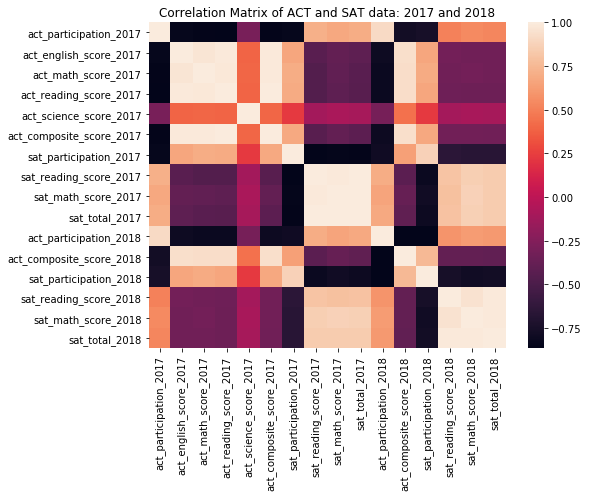

In [55]:
plt.figure(figsize=(8,6))
sns.heatmap(final.corr())
plt.title("Correlation Matrix of ACT and SAT data: 2017 and 2018")
plt.show()

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [56]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])

    fig.tight_layout()

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

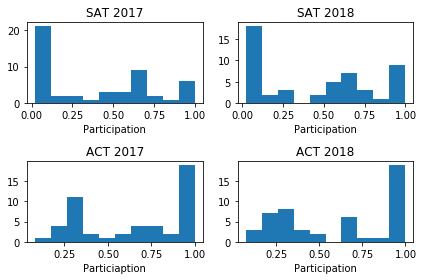

In [57]:
subplot_histograms( final, ["sat_participation_2017", "sat_participation_2018","act_participation_2017", "act_participation_2018"],                             ["SAT 2017", "SAT 2018","ACT 2017", "ACT 2018"], ["Participation", "Participation", "Particiaption", "Participation"])

In [58]:
final.columns

Index(['state', 'act_participation_2017', 'act_english_score_2017',
       'act_math_score_2017', 'act_reading_score_2017',
       'act_science_score_2017', 'act_composite_score_2017',
       'sat_participation_2017', 'sat_reading_score_2017',
       'sat_math_score_2017', 'sat_total_2017', 'act_participation_2018',
       'act_composite_score_2018', 'sat_participation_2018',
       'sat_reading_score_2018', 'sat_math_score_2018', 'sat_total_2018'],
      dtype='object')

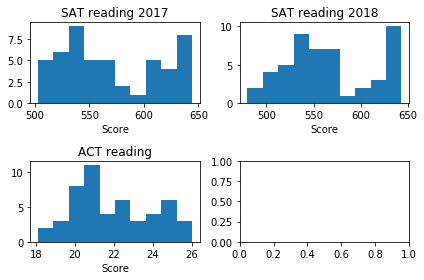

In [59]:
subplot_histograms( final, ["sat_reading_score_2017", "sat_reading_score_2018","act_reading_score_2017"],                             ["SAT reading 2017", "SAT reading 2018", "ACT reading"], ["Score", "Score", "Score"])

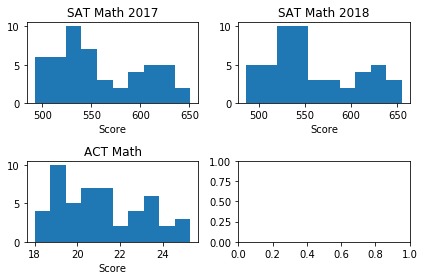

In [60]:
subplot_histograms( final, ["sat_math_score_2017", "sat_math_score_2018","act_math_score_2017"],                             ["SAT Math 2017", "SAT Math 2018", "ACT Math"], ["Score", "Score", "Score"])

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [61]:
final.columns

Index(['state', 'act_participation_2017', 'act_english_score_2017',
       'act_math_score_2017', 'act_reading_score_2017',
       'act_science_score_2017', 'act_composite_score_2017',
       'sat_participation_2017', 'sat_reading_score_2017',
       'sat_math_score_2017', 'sat_total_2017', 'act_participation_2018',
       'act_composite_score_2018', 'sat_participation_2018',
       'sat_reading_score_2018', 'sat_math_score_2018', 'sat_total_2018'],
      dtype='object')

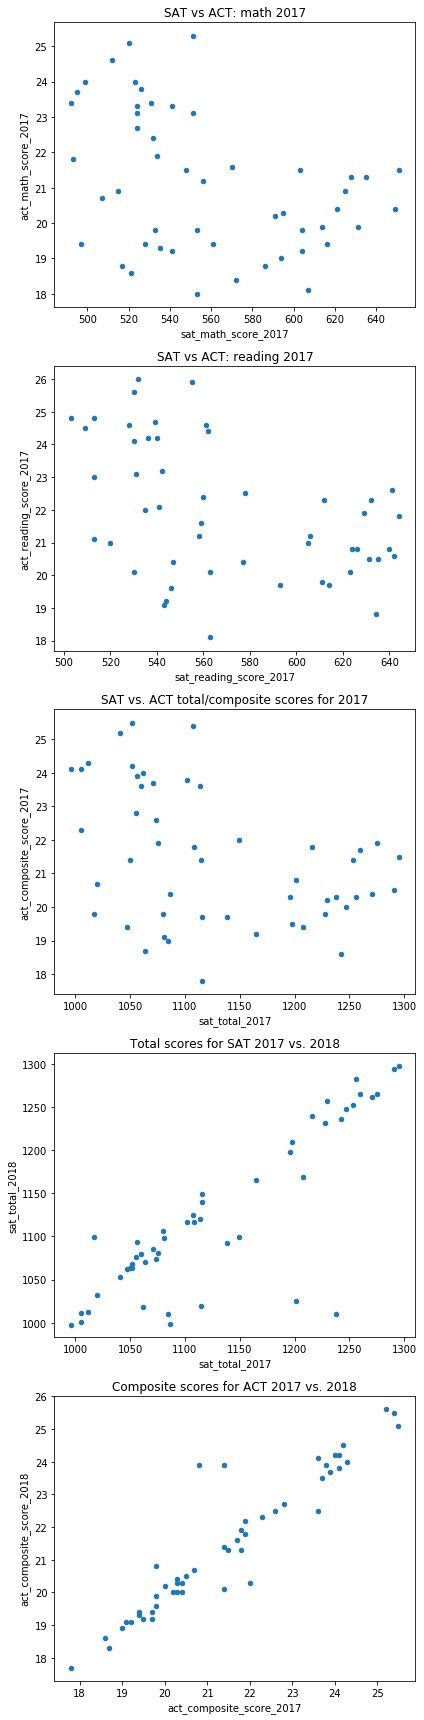

In [62]:
plots = [   ("sat_math_score_2017", "act_math_score_2017", "SAT vs ACT: math 2017"),
            ("sat_reading_score_2017", 'act_reading_score_2017', "SAT vs ACT: reading 2017"),
            ("sat_total_2017", "act_composite_score_2017", "SAT vs. ACT total/composite scores for 2017"),
            ("sat_total_2017", "sat_total_2018", "Total scores for SAT 2017 vs. 2018"),
            ("act_composite_score_2017", "act_composite_score_2018", "Composite scores for ACT 2017 vs. 2018")]

fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(6,24))
for i, (x,y,title) in enumerate(plots):
    final.plot.scatter(x,y, title=title, ax=ax[i])


fig.tight_layout()

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

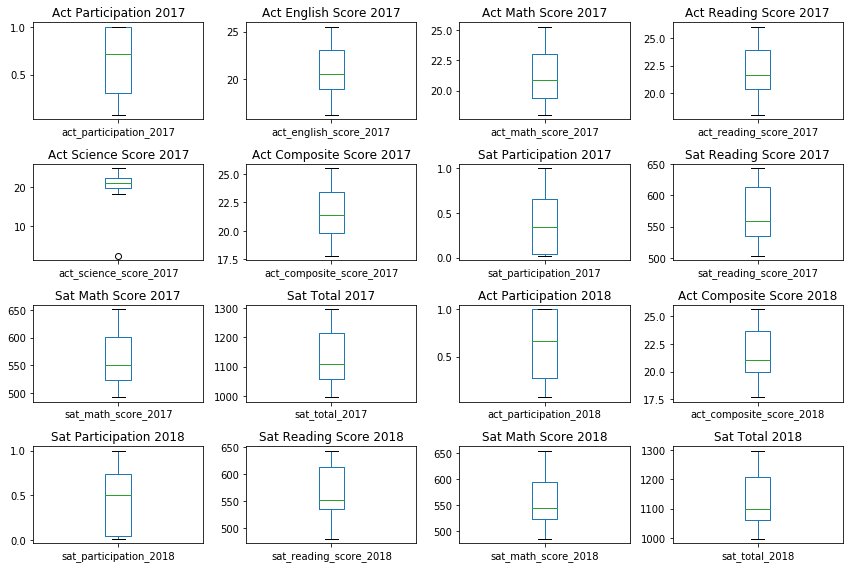

In [63]:
fig, ax = plt.subplots(nrows=4, ncols = 4, figsize=(12,8))
ax = ax.ravel()
cols = list(final.columns)
for i, col in enumerate(cols[1:]):
    final[col].plot.box(ax=ax[i])
    ax[i].set_title(col.replace("_"," ").title())

fig.tight_layout()

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [70]:
final[final.state.isin(["Oklahoma"])].set_index("state")

,act_participation_2017,act_english_score_2017,act_math_score_2017,act_reading_score_2017,act_science_score_2017,act_composite_score_2017,sat_participation_2017,sat_reading_score_2017,sat_math_score_2017,sat_total_2017,act_participation_2018,act_composite_score_2018,sat_participation_2018,sat_reading_score_2018,sat_math_score_2018,sat_total_2018
state,,,,,,,,,,,,,,,,
Oklahoma,1.0,18.5,18.8,20.1,19.6,19.4,0.07,530,517,1047,1.0,19.3,0.08,541,521,1062


In [ ]:
sat = final.loc[final.state.isn(["Oklahoma"]), ["state"]]

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).


1) Florida has very high SAT participation rates (100%). Unlike most of the other
   states with equal participation rates, Florida does not have mandatory testing.
   The increase in participation is instead due to waiving of the $50 test fees      and the test day being moved from Saturday to during the school week.
    
2) Oklahoma was one of the only states in 2017 to have participation rates below      10% and still have an average score below 1050.

3) West Vrigina, like Oklahoma, was one of the few states to have participation      rates below 20% (West VA's participation rate in 2017 was 14%) and still have      scores on the low end (1086, only 3 points above the national average).            Interestingly, West VA's participation rate doubled in 2018 (jumping from 14%      to 28%). Similar to other states with drasticially increasing participation        rates, they saw a dip in their scores.





## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

In [ ]:
# ANSWER:

#    Additional data that would be helpful would be 1) The average income for families 
#    in each state and 2) Data regarding the number (and quality) of in state / nearby 
#    colleges in each state. It could also be useful to have more highschooler specific
#    data such as what percentage also have jobs

## Bonus: Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [64]:
for col in final.drop('state', axis=1).columns:
    output = f"""
    Stats for column: {col}
n = {len(final[col])}
---Central Tendency---
Mean: {final[col].mean()}
Median: {final[col].median()}
Mode(s)...
Value:  Occurances:
{final[col].value_counts()[final[col].value_counts().index.isin(final[col].mode())]}

---Spread---
Standard Deviation: {final[col].std()}

---Skew---
Skew: {final[col].skew()}"""
    
    print(output)


    Stats for column: act_participation_2017
n = 50
---Central Tendency---
Mean: 0.6591999999999999
Median: 0.71
Mode(s)...
Value:  Occurances:
1.0    17
Name: act_participation_2017, dtype: int64

---Spread---
Standard Deviation: 0.3211067595370863

---Skew---
Skew: -0.24388901157452442

    Stats for column: act_english_score_2017
n = 50
---Central Tendency---
Mean: 20.862
Median: 20.549999999999997
Mode(s)...
Value:  Occurances:
19.5    3
19.0    3
21.2    3
Name: act_english_score_2017, dtype: int64

---Spread---
Standard Deviation: 2.3243072261714137

---Skew---
Skew: 0.3966240985853101

    Stats for column: act_math_score_2017
n = 50
---Central Tendency---
Mean: 21.136
Median: 20.9
Mode(s)...
Value:  Occurances:
19.4    4
Name: act_math_score_2017, dtype: int64

---Spread---
Standard Deviation: 1.9739900543553606

---Skew---
Skew: 0.38288540012789346

    Stats for column: act_reading_score_2017
n = 50
---Central Tendency---
Mean: 21.956
Median: 21.700000000000003
Mode(s)...
Va

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

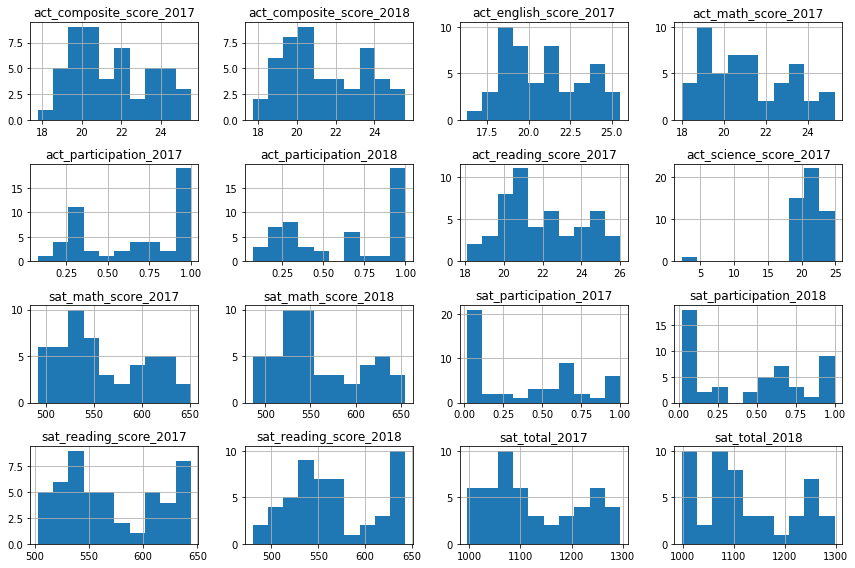

In [65]:
final.hist(figsize=(12,8))
plt.tight_layout()
plt.show()

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

While many of the underlying concepts are essentially the same,

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [66]:
# Code: